# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


In [10]:
print(cities)

['mys shmidta', 'luderitz', 'praia da vitoria', 'kochi', 'elk city', 'punta arenas', 'taolanaro', 'castro', 'sentyabrskiy', 'kavieng', 'kapaa', 'chkalovskoye', 'hilo', 'issoudun', 'busselton', 'souillac', 'mahebourg', 'provideniya', 'san cristobal', 'albany', 'ferrol', 'tasiilaq', 'mataura', 'pacific grove', 'bluff', 'avarua', 'hermanus', 'san patricio', 'clyde river', 'ushuaia', 'guerrero negro', 'luena', 'ust-kulom', 'padang', 'port alfred', 'chuy', 'bonoua', 'flinders', 'cape town', 'fortuna', 'rikitea', 'georgetown', 'aklavik', 'antofagasta', 'olafsvik', 'nizhneyansk', 'airai', 'nikolskoye', 'vostok', 'barrow', 'tuatapere', 'ponta do sol', 'alofi', 'illoqqortoormiut', 'san quintin', 'leningradskiy', 'usvyaty', 'tigil', 'port hardy', 'iberia', 'saint-philippe', 'severo-kurilsk', 'jamestown', 'te anau', 'the valley', 'bredasdorp', 'puerto ayora', 'chapais', 'kanakapura', 'longyearbyen', 'cidreira', 'arraial do cabo', 'kodiak', 'oranjestad', 'garmsar', 'alta', 'tuktoyaktuk', 'tiebisso

In [19]:
city_data = []
city='varhaug'
city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather,indent=4,sort_keys = True))


{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 58.6147,
        "lon": 5.6457
    },
    "dt": 1674874660,
    "id": 3132644,
    "main": {
        "feels_like": 273.31,
        "grnd_level": 1016,
        "humidity": 95,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 277.92,
        "temp_max": 278.65,
        "temp_min": 277.42
    },
    "name": "Varhaug",
    "sys": {
        "country": "NO",
        "id": 2004016,
        "sunrise": 1674892404,
        "sunset": 1674920816,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 271,
        "gust": 12.8,
        "speed": 7.17
    }
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
#url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'



    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | kochi
Processing Record 5 of Set 1 | elk city
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | chkalovskoye
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | issoudun
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | albany
Processing Record 21 of Se

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,17.99,70,0,7.40,NA,1674874945
1,praia da vitoria,38.7333,-27.0667,12.64,92,77,5.88,PT,1674874946
2,kochi,9.9399,76.2602,23.99,77,11,2.20,IN,1674874857
3,elk city,35.4120,-99.4043,2.12,64,0,5.13,US,1674874946
4,punta arenas,-53.1500,-70.9167,11.73,71,100,9.01,CL,1674874848


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,17.99,70,0,7.40,NaN,1674874945
1,praia da vitoria,38.7333,-27.0667,12.64,92,77,5.88,PT,1674874946
2,kochi,9.9399,76.2602,23.99,77,11,2.20,IN,1674874857
3,elk city,35.4120,-99.4043,2.12,64,0,5.13,US,1674874946
4,punta arenas,-53.1500,-70.9167,11.73,71,100,9.01,CL,1674874848


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

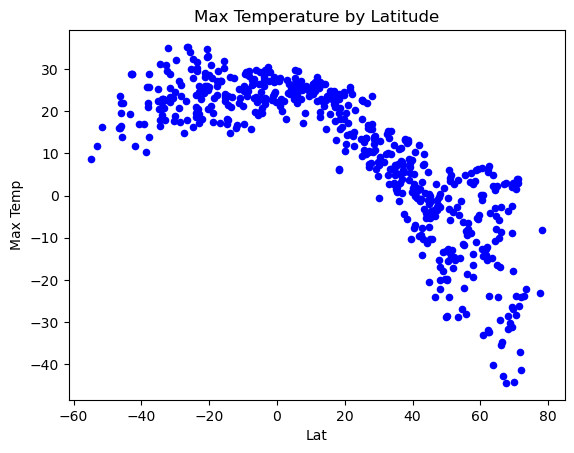

In [25]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x='Lat',y='Max Temp', kind="scatter", color='blue')

# Incorporate the other graph properties
plt.title('Max Temperature by Latitude')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

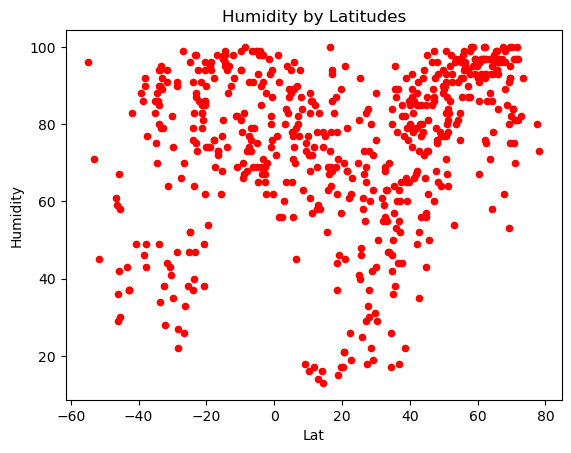

In [26]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x='Lat',y='Humidity', kind="scatter", color='red')

# Incorporate the other graph properties
plt.title('Humidity by Latitudes')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

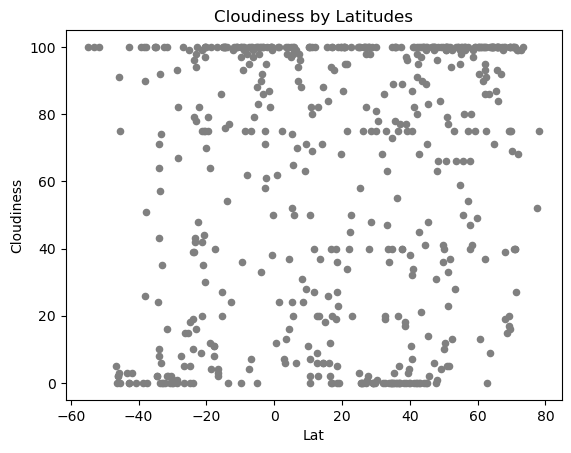

In [27]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x='Lat',y='Cloudiness', kind="scatter", color='grey')

# Incorporate the other graph properties
plt.title('Cloudiness by Latitudes')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

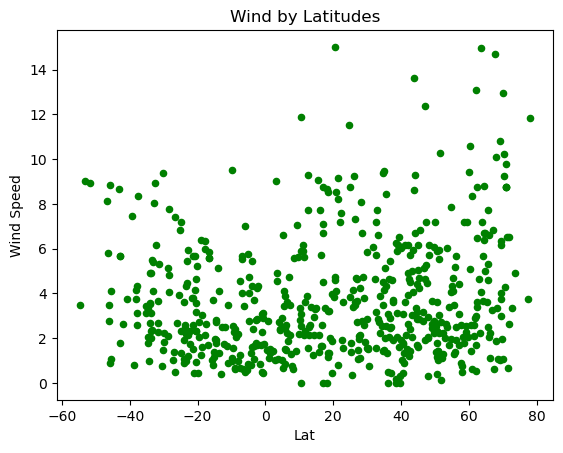

In [28]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x='Lat',y='Wind Speed', kind="scatter", color='green')

# Incorporate the other graph properties
plt.title('Wind by Latitudes')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def linear_regression(latitudes,weather):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, weather)
    regress_values = latitudes * slope + intercept
    regression_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,praia da vitoria,38.7333,-27.0667,12.64,92,77,5.88,PT,1674874946
2,kochi,9.9399,76.2602,23.99,77,11,2.20,IN,1674874857
3,elk city,35.4120,-99.4043,2.12,64,0,5.13,US,1674874946
7,kapaa,22.0752,-159.3190,24.18,61,40,7.20,US,1674874949
8,chkalovskoye,44.8392,133.0436,-20.40,85,89,3.17,RU,1674874950


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,17.99,70,0,7.40,NaN,1674874945
4,punta arenas,-53.1500,-70.9167,11.73,71,100,9.01,CL,1674874848
5,castro,-24.7911,-50.0119,16.30,96,18,2.32,BR,1674874948
6,kavieng,-2.5744,150.7967,29.29,69,58,4.24,PG,1674874949
11,busselton,-33.6500,115.3333,22.98,34,0,2.01,AU,1674874952


###  Temperature vs. Latitude Linear Regression Plot

ValueError: x, y, and format string must not be None

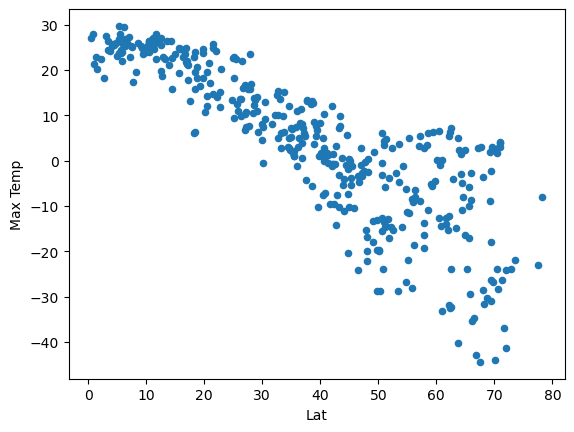

In [43]:
# Linear regression on Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_temps = northern_hemi_df['Max Temp']
nh_temp_regress = linear_regression(north_lats,northern_hemi_df['Max Temp'])
northern_hemi_df.plot(x='Lat',y='Max Temp',kind='scatter')
plt.plot(north_lats,nh_temp_regress)
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE